# Análisis de Ley de Refracción

A continuación se realizará un análisis numérico para las mediciones realizadas durante la experimentación de ley de refracción.

## Lectura de Datos

Carga de librerías:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Lectura del archivo .csv de mediciones:

In [2]:
df = pd.read_csv("experiment1_data.csv")
df.head()

,Refraccion,Incidencia
0,0.017452,0.000000
1,0.104528,0.173648
2,0.216440,0.342020
3,0.325568,0.500000
4,0.422618,0.642788


Tomando al seno de los ángulos de refracción como la variable independiente x y al seno de los ángulos de incidencia como la variable dependiente y(x):

In [3]:
x = df['Refraccion']
y = df['Incidencia']

Graficando los datos obtenidos en la experimentación:

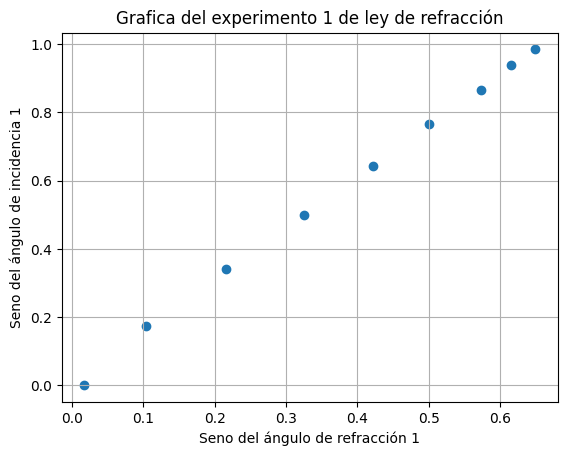

In [4]:
plt.scatter(x, y)
plt.xlabel('Seno del ángulo de refracción 1')
plt.ylabel('Seno del ángulo de incidencia 1')
plt.title('Grafica del experimento 1 de ley de refracción')
plt.grid(True)
plt.show()

## Modelo de Regresión Lineal

Calculando la media de x y y:

In [5]:
x_mean = x.mean()
y_mean = y.mean()

Calculando la suma de cuadrados para x y y:

In [6]:
x_sum = ((x - x_mean)**2).sum()
y_sum = ((y - y_mean)**2).sum()

Calculo de suma de productos para x y y:

In [7]:
psum_xy = ((x - x_mean) * (y - y_mean)).sum()

Calculo de la pendiente m y la ordenada al origen b0:

In [8]:
m = psum_xy/x_sum
b0 = y_mean - (m * x_mean)

Siendo el modelo lineal y = mx + b0:

In [9]:
print(f'y = {float(m)} x + {float(b0)}')

y = 1.5272432703958483 x + 0.040252007433903


Calculo de predicciones a través de un modelo de regresión lineal simple:

In [10]:
y_pred = b0 + m*x

Calculo de r²:

In [11]:
r2 = (psum_xy ** 2)/(x_sum * y_sum)
float(r2)

0.8590076275082329

Calculo de la desviación estandar de los residuos:

In [12]:
residuos = y - y_pred
std_residuos = np.std(residuos)
float(std_residuos)

0.011444993320377957

## Graficando el Modelo Lineal

Utilizando el modelo de regresión lineal realizado, obtenemos las siguiente gráfica:

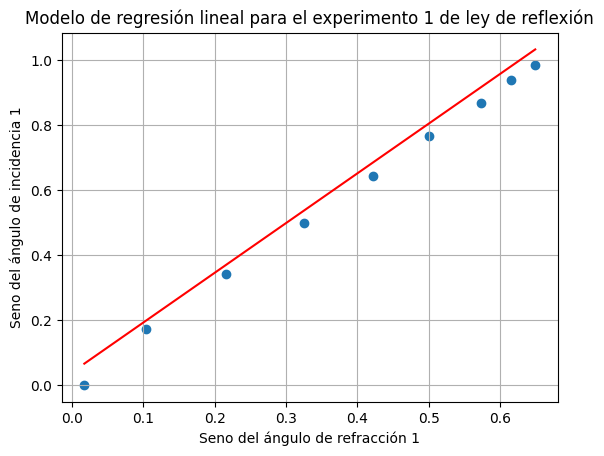

In [13]:
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Seno del ángulo de refracción 1')
plt.ylabel('Seno del ángulo de incidencia 1')
plt.title('Modelo de regresión lineal para el experimento 1 de ley de reflexión')
plt.grid(True)
plt.show()

## Propagación de Errores

Finalmente, se realizará el cálculo de la propagación de errores para la pendiente y la ordenada al origen.

Siendo la incertidumbre de x y y:

In [15]:
dx = dy = 0.5

In [19]:
n = len(x)
sigma_m = np.sqrt((dy**2 / x_sum) + (m**2 * dx**2 / x_sum))
sigma_b0 = np.sqrt((dy**2 / n) + (dx**2 * m**2 / x_sum) + (x_mean**2 * dy**2 / x_sum))
print(f'Incertidumbre en la pendiente (m): ±{sigma_m:.4f}')
print(f'Incertidumbre en la intersección (b0): ±{sigma_b0:.4f}')

Incertidumbre en la pendiente (m): ±1.4103
Incertidumbre en la intersección (b0): ±1.2262
